In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import pickle

In [2]:
df=pd.read_csv("/content/drive/MyDrive/github/collegeproject/datasets/south_crop_class.csv")

In [3]:
df.columns

Index(['ph', 'rainfall', 'sowing_temp', 'harvesting_temp', 'P', 'N', 'K',
       'crop'],
      dtype='object')

In [4]:
df.describe()

,ph,rainfall,sowing_temp,harvesting_temp,P,N,K
count,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000
mean,6.748307,80.620434,26.451327,26.328609,30.819308,15.047147,6.325309
std,0.896224,55.533424,4.592156,6.464179,24.571258,10.960833,6.400846
min,4.500211,7.501110,15.002345,14.003701,0.000000,0.000000,0.000000
25%,6.219942,54.358277,23.131144,21.018464,11.350984,7.419885,0.000000
50%,6.687936,67.702089,26.330088,24.895447,22.363327,11.885304,8.562292
75%,7.151240,93.104739,29.626397,31.492067,47.248276,22.131973,11.390586
max,9.992079,299.865346,39.997403,39.999557,95.994671,45.994962,27.997463


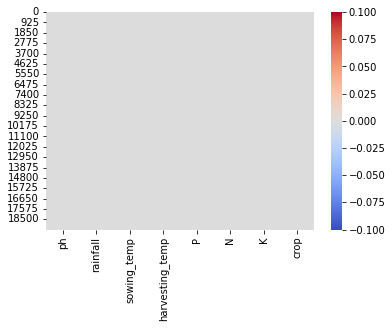

In [5]:
# Heatmap to check null/missing values
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<ipython-input-6-1bd3e8ed60d3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sowing_temp'],color="brown",bins=15,hist_kws={'alpha':0.2})
<ipython-input-6-1bd3e8ed60d3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['harvesting_temp'],color="green",bins=15,hist_kws={'alpha':0.2})
<ipy

<Axes: xlabel='rainfall', ylabel='Density'>

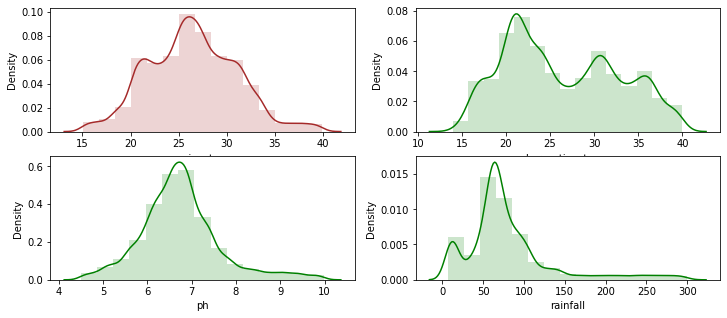

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(2, 2, 1)
sns.distplot(df['sowing_temp'],color="brown",bins=15,hist_kws={'alpha':0.2})
plt.subplot(2, 2, 2)
sns.distplot(df['harvesting_temp'],color="green",bins=15,hist_kws={'alpha':0.2})
plt.subplot(2, 2, 3)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})
plt.subplot(2, 2, 4)
sns.distplot(df['rainfall'],color="green",bins=15,hist_kws={'alpha':0.2})

<Axes: xlabel='count', ylabel='crop'>

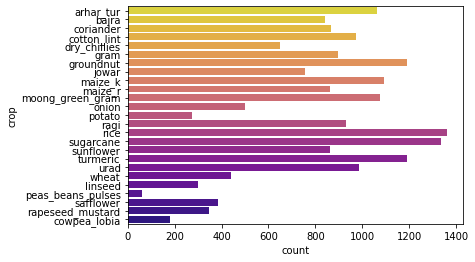

In [7]:
sns.countplot(y='crop',data=df, palette="plasma_r")

In [ ]:
# sns.pairplot(df, hue = 'crop')

In [8]:
df['crop'].unique()

array(['arhar_tur', 'bajra', 'coriander', 'cotton_lint', 'dry_chillies',
       'gram', 'groundnut', 'jowar', 'maize_k', 'maize_r',
       'moong_green_gram', 'onion', 'potato', 'ragi', 'rice', 'sugarcane',
       'sunflower', 'turmeric', 'urad', 'wheat', 'linseed',
       'peas_beans_pulses', 'safflower', 'rapeseed_mustard',
       'cowpea_lobia'], dtype=object)

<Axes: xlabel='count', ylabel='crop'>

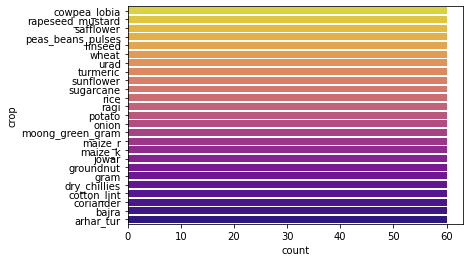

In [9]:
from sklearn.utils import resample,shuffle
column_values = df['crop'].unique()
# Loop over the unique values of the column
for value in column_values:
    # Create a dataframe for each unique value
    df_1 = df[df['crop'] == value]

    other_df = df[df['crop'] != value]  
    #upsample the minority class
    df_sampled = resample(df_1,random_state=42,n_samples=60,replace=False)
    df = pd.concat([df_sampled,other_df])
sns.countplot(y='crop',data=df, palette="plasma_r")

In [ ]:
# df.to_csv("/content/drive/MyDrive/github/collegeproject/datasets/uniform_distribution_south_crops.csv",index=False)

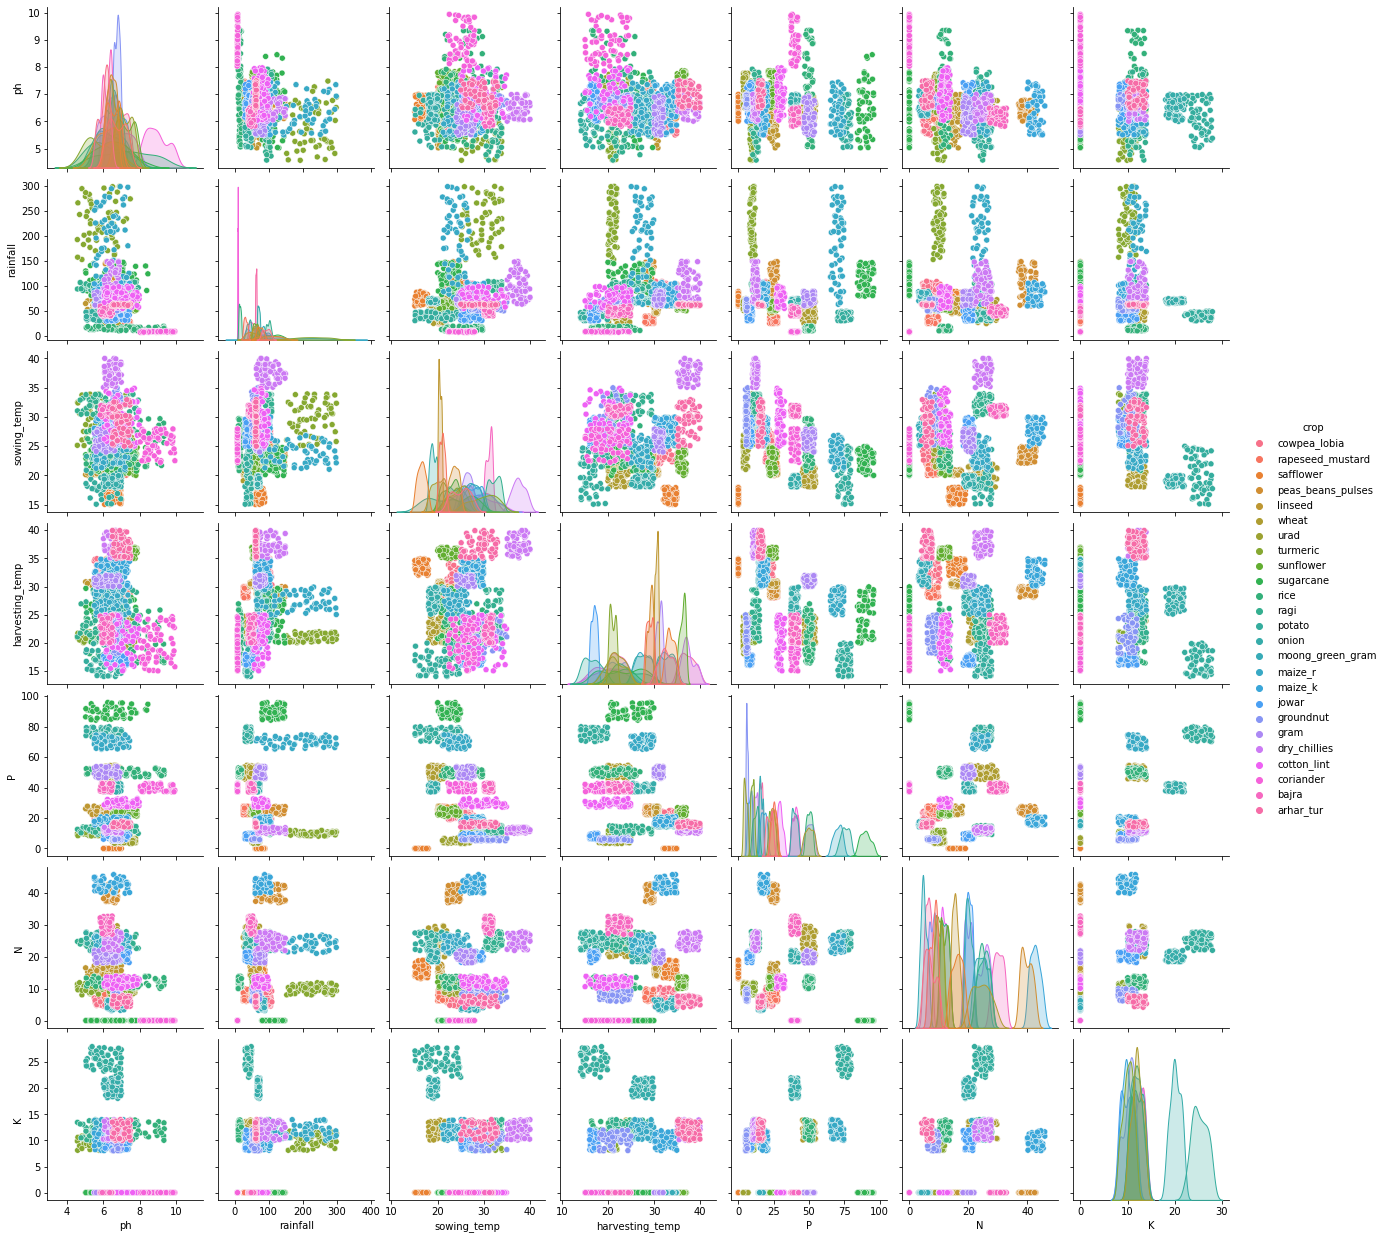

In [10]:
sns.pairplot(df, hue = 'crop')

<Axes: xlabel='ph', ylabel='crop'>

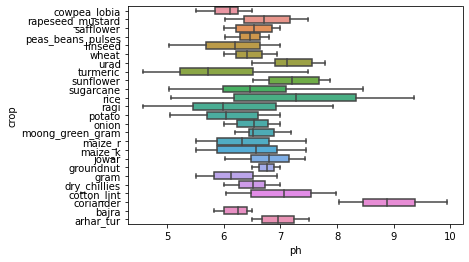

In [11]:
sns.boxplot(y='crop',x='ph',data=df)

In [12]:
c=df.crop.astype('category')
targets = dict(enumerate(c.cat.categories))
df['crop']=c.cat.codes

In [13]:
df['crop'].unique()

array([ 4, 17, 19, 14,  9, 24, 23, 22, 21, 20, 18, 16, 15, 13, 12, 11, 10,
        8,  7,  6,  5,  3,  2,  1,  0], dtype=int8)

In [14]:
x_copy=df.iloc[:,0:-1]

In [15]:
x_copy

,ph,rainfall,sowing_temp,harvesting_temp,P,N,K
14315,6.190819,82.453019,25.546449,33.191269,23.625791,5.564972,0.000000
15488,6.451502,78.826798,25.293449,32.268385,22.295780,4.842791,0.000000
18807,6.139185,91.407007,23.103355,32.032386,21.193088,8.949253,0.000000
16677,5.744226,81.870365,22.044249,31.370181,21.208217,7.423088,0.000000
18799,5.669681,82.962095,24.344533,33.257709,21.242436,10.182154,0.000000
...,...,...,...,...,...,...,...
17439,6.773686,63.080964,30.120113,37.484478,16.062193,5.293368,12.024518
591,7.407446,62.765029,26.887705,37.786305,14.205899,6.083474,11.748530
12266,6.585444,62.432877,32.548916,37.565687,16.894548,7.688613,11.396326
5417,7.157690,63.700954,25.001385,35.314480,14.158599,5.810852,11.239367


<Axes: >

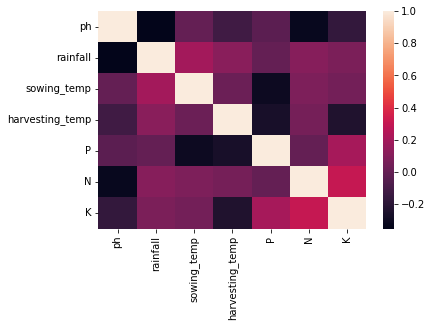

In [16]:
sns.heatmap(x_copy.corr())

In [18]:
x=df.iloc[:,0:-1].values 
y=df.iloc[:,-1].values
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)


Inputs shape  (1500, 7)
Outputs shape  (1500,)


In [ ]:
# from sklearn.model_selection import train_test_split as tts
# from sklearn.preprocessing import MinMaxScaler

# x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.2)

# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)

# # we must apply the scaling to the test set as well that we are computing for the training set
# x_test = scaler.transform(x_test)
# print(x_train.shape)
# print(x_test.shape
# print(y_train.shape)
# print(y_test.shape)

(1200, 7)
(300, 7)
(1200,)
(300,)


In [19]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.2)
normzr=Normalizer()
x_train=normzr.fit_transform(x_train)
x_test=normzr.transform(x_test)

pickle.dump(normzr,open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/normalizer.pkl','wb'))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200, 7)
(300, 7)
(1200,)
(300,)


Random forest Accuracy is:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        16
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00    

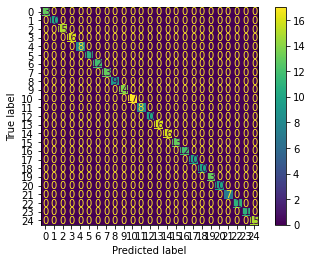

In [20]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay,ConfusionMatrixDisplay

classifier = RandomForestClassifier(n_estimators=65,random_state=2022)
classifier.fit(x_train,y_train)
y_pred_forest=classifier.predict(x_test)

predicted_values = y_pred_forest
x = metrics.accuracy_score(y_test, predicted_values)
# acc.append(x)
# model.append('Random Forest')
print("Random forest Accuracy is: ", x*100)
matrix_plot=confusion_matrix(y_test, y_pred_forest, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=classifier.classes_)
disp.plot()
print(classification_report(y_test, y_pred_forest))

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_train, y_train)
clf.score(x_test,y_test)

0.9733333333333334

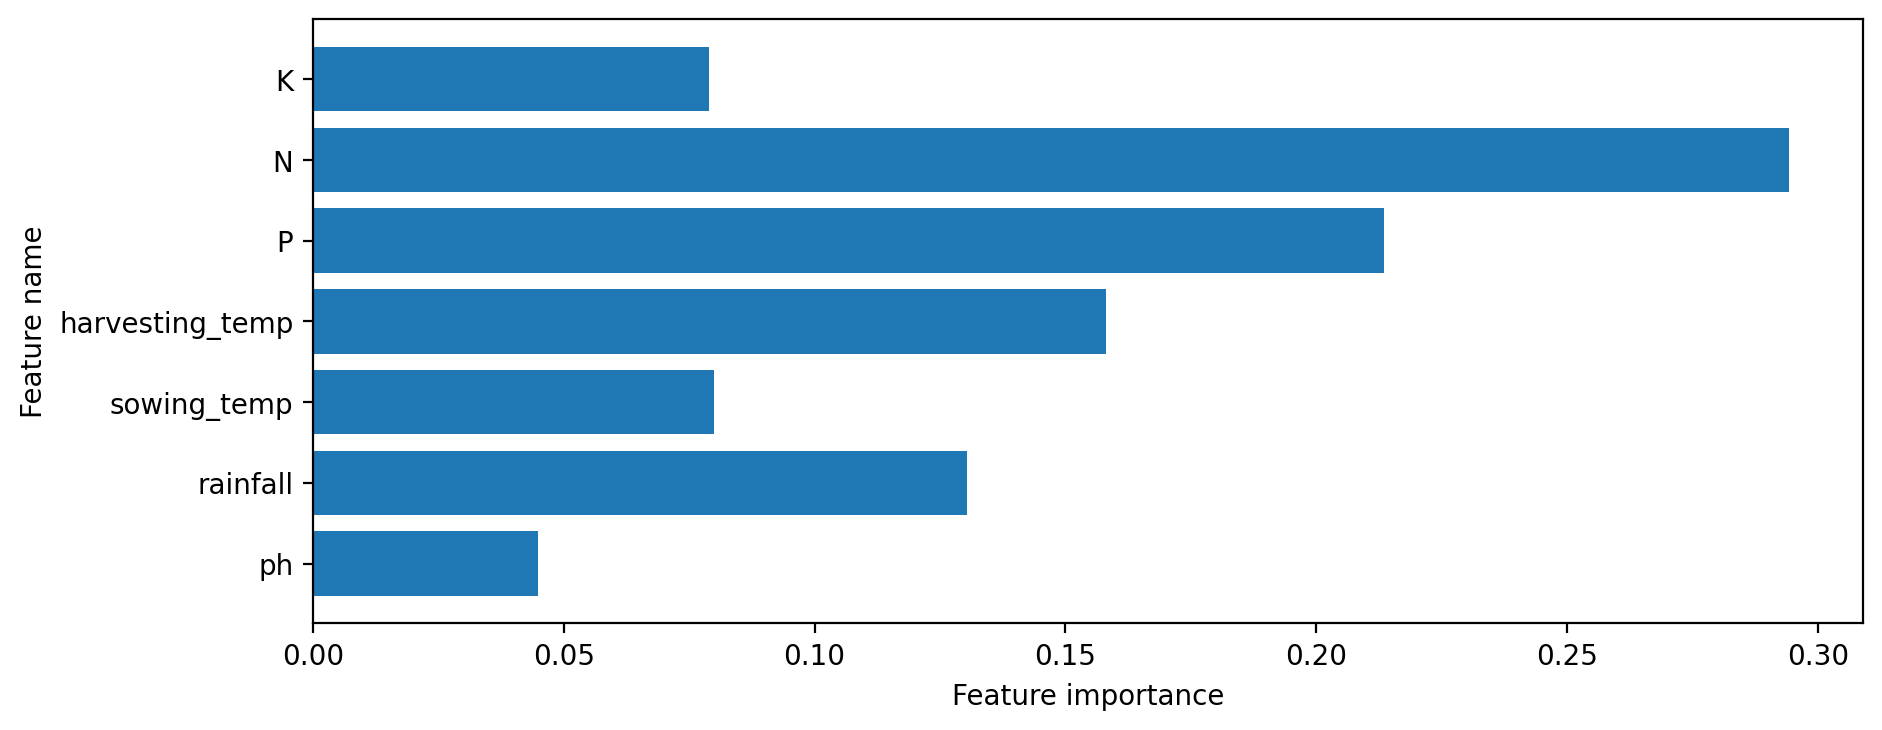

In [22]:
plt.figure(figsize=(10,4), dpi=200)
c_features = len(x_copy.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), x_copy.columns)
plt.show()